In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,2.575873e+07,1.585146e+06,2160
1,1,2,2.093498e+07,1.511580e+06,2160
2,2,3,2.473638e+07,2.061731e+06,2160
3,3,4,1.771628e+07,2.028604e+06,2160
4,4,5,9.715531e+06,8.426243e+05,2160
...,...,...,...,...,...
145,145,21,2.209689e+06,3.304367e+04,360
146,146,22,2.285067e+06,3.488049e+04,360
147,147,23,1.595180e+06,2.678645e+04,360
148,148,24,2.364400e+06,3.232247e+04,360


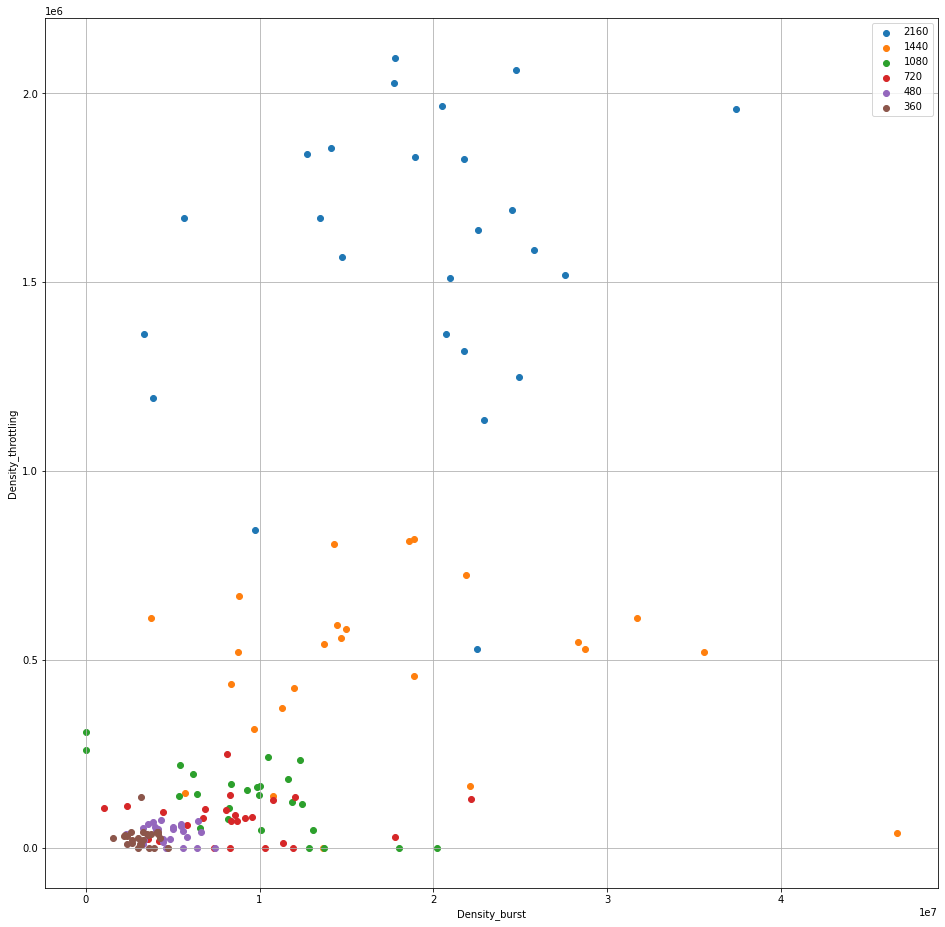

In [3]:
# Посмотрим на данные

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

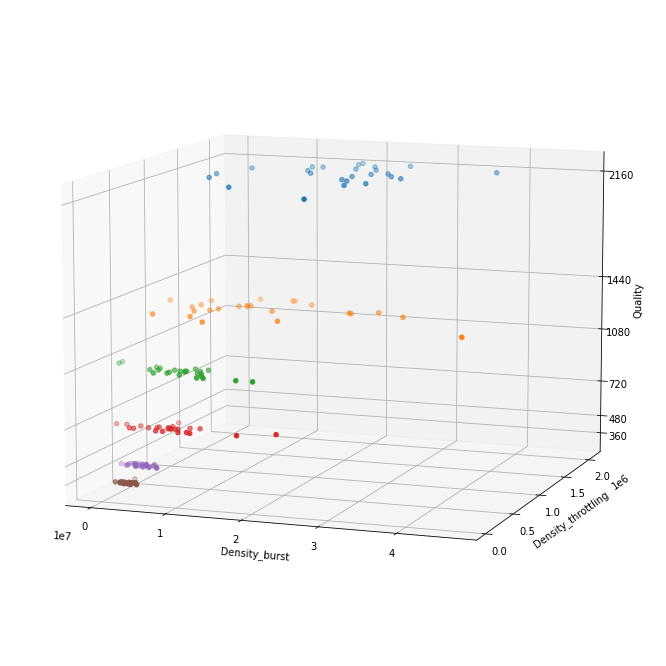

In [4]:
fig_3d = plt.figure(figsize=(12, 12))
ax = fig_3d.add_subplot(projection='3d')

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    z = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
            z.append(quality)
    ax.scatter(x, y, z)
    
ax.set_xlabel('Density_burst')
ax.set_ylabel('Density_throttling')
ax.set_zlabel('Quality')

ax.view_init(10,-70)

ax.set_zticks([360, 480, 720, 1080, 1440, 2160])

plt.grid(True)

plt.show()

In [5]:
data_shuffled = shuffle(data)
data_shuffled

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
138,138,14,4.149992e+06,4.431276e+04,360
81,81,7,8.344910e+06,7.273535e+04,720
43,43,19,1.887642e+07,8.197498e+05,1440
30,30,6,3.556426e+07,5.211535e+05,1440
96,96,22,9.554201e+06,8.360160e+04,720
...,...,...,...,...,...
136,136,12,3.021962e+06,2.636327e+04,360
3,3,4,1.771628e+07,2.028604e+06,2160
13,13,14,1.270726e+07,1.840270e+06,2160
72,72,23,8.257588e+06,1.064991e+05,1080


In [6]:
# Пробуем обычный KNN

X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.5133333333333333
2   0.5
3   0.5199999999999999
4   0.48666666666666664
5   0.4866666666666667
6   0.5333333333333333
7   0.4866666666666667
8   0.48
9   0.5066666666666666
10  0.4800000000000001
11  0.48666666666666664
12  0.47333333333333333
13  0.5133333333333334
14  0.4866666666666667
15  0.49333333333333335
16  0.49333333333333335
17  0.5066666666666666
18  0.5
19  0.5
20  0.4800000000000001
21  0.47333333333333333
22  0.48
23  0.47333333333333333
24  0.5000000000000001
25  0.5133333333333334
26  0.5133333333333333
27  0.5
28  0.49333333333333335
29  0.5


In [7]:
# Лучшее значение -- 0.533 для n = 6

In [8]:
# Нужно нормализовать данные

data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
138,138,14,0.088896,0.021152,360
81,81,7,0.178756,0.034720,720
43,43,19,0.404355,0.391316,1440
30,30,6,0.761831,0.248777,1440
96,96,22,0.204661,0.039907,720
...,...,...,...,...,...
136,136,12,0.064732,0.012583,360
3,3,4,0.379503,0.968376,2160
13,13,14,0.272204,0.878473,2160
72,72,23,0.176886,0.050837,1080


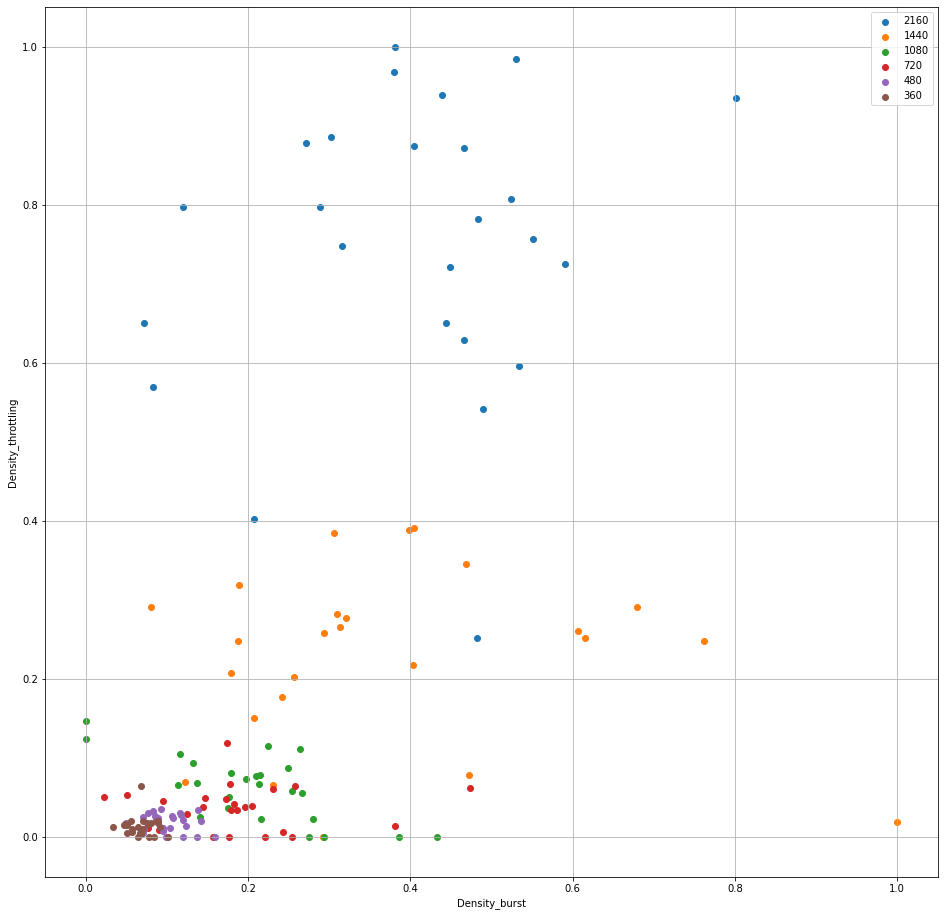

In [9]:
# Строим график ещё раз, теперь с нормализованными данными

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality'][i] == quality:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
# Не то чтобы много поменялось, но это поможет нам для дальнейшей работы с классификаторами

In [11]:
# Пробуем KNN, но теперь с нормализованными данными

X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.64
2   0.68
3   0.72
4   0.7133333333333334
5   0.7066666666666668
6   0.7
7   0.7
8   0.72
9   0.7066666666666667
10  0.7066666666666667
11  0.6933333333333334
12  0.6933333333333332
13  0.6733333333333333
14  0.6733333333333335
15  0.6599999999999999
16  0.6533333333333333
17  0.6599999999999999
18  0.6799999999999999
19  0.6733333333333332
20  0.6866666666666668
21  0.6866666666666668
22  0.6666666666666667
23  0.6733333333333335
24  0.6666666666666667
25  0.6533333333333333
26  0.6666666666666667
27  0.6533333333333333
28  0.6533333333333333
29  0.6599999999999999


In [12]:
# Точность улучшилась -- теперь это 0.713 для n = 4 и других

In [33]:
# Пробуем CatBoost

model = CatBoostClassifier(iterations = 200)
scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')

Learning rate set to 0.278356
0:	learn: 1.5225498	total: 1.06ms	remaining: 212ms
1:	learn: 1.3453899	total: 2.11ms	remaining: 209ms
2:	learn: 1.2368076	total: 3.07ms	remaining: 202ms
3:	learn: 1.1491408	total: 4.3ms	remaining: 211ms
4:	learn: 1.0711560	total: 5.23ms	remaining: 204ms
5:	learn: 1.0002445	total: 6.16ms	remaining: 199ms
6:	learn: 0.9585225	total: 7.12ms	remaining: 196ms
7:	learn: 0.9151127	total: 8.48ms	remaining: 204ms
8:	learn: 0.8826556	total: 9.53ms	remaining: 202ms
9:	learn: 0.8583416	total: 10.5ms	remaining: 200ms
10:	learn: 0.8186014	total: 11.5ms	remaining: 197ms
11:	learn: 0.7922923	total: 12.4ms	remaining: 194ms
12:	learn: 0.7612911	total: 13.5ms	remaining: 194ms
13:	learn: 0.7333187	total: 14.4ms	remaining: 192ms
14:	learn: 0.7091489	total: 15.4ms	remaining: 190ms
15:	learn: 0.6839589	total: 16.4ms	remaining: 188ms
16:	learn: 0.6656766	total: 17.4ms	remaining: 188ms
17:	learn: 0.6483499	total: 18.4ms	remaining: 186ms
18:	learn: 0.6343443	total: 19.5ms	remaining:

194:	learn: 0.0999052	total: 191ms	remaining: 4.89ms
195:	learn: 0.0994487	total: 192ms	remaining: 3.92ms
196:	learn: 0.0989978	total: 193ms	remaining: 2.94ms
197:	learn: 0.0984909	total: 194ms	remaining: 1.96ms
198:	learn: 0.0980333	total: 195ms	remaining: 980us
199:	learn: 0.0974729	total: 196ms	remaining: 0us
Learning rate set to 0.278356
0:	learn: 1.4944007	total: 1.01ms	remaining: 202ms
1:	learn: 1.3045919	total: 1.97ms	remaining: 195ms
2:	learn: 1.1926183	total: 3ms	remaining: 197ms
3:	learn: 1.0941012	total: 4.04ms	remaining: 198ms
4:	learn: 1.0182791	total: 5.03ms	remaining: 196ms
5:	learn: 0.9494852	total: 6.21ms	remaining: 201ms
6:	learn: 0.8993687	total: 7.25ms	remaining: 200ms
7:	learn: 0.8539338	total: 8.23ms	remaining: 197ms
8:	learn: 0.8279070	total: 9.19ms	remaining: 195ms
9:	learn: 0.8031177	total: 10.2ms	remaining: 193ms
10:	learn: 0.7700414	total: 11.1ms	remaining: 191ms
11:	learn: 0.7444876	total: 12.1ms	remaining: 189ms
12:	learn: 0.7140084	total: 13ms	remaining: 1

Learning rate set to 0.278356
0:	learn: 1.5396123	total: 1.01ms	remaining: 201ms
1:	learn: 1.3408402	total: 1.95ms	remaining: 193ms
2:	learn: 1.2222033	total: 2.94ms	remaining: 193ms
3:	learn: 1.1339142	total: 3.97ms	remaining: 194ms
4:	learn: 1.0509596	total: 4.88ms	remaining: 190ms
5:	learn: 0.9826488	total: 5.84ms	remaining: 189ms
6:	learn: 0.9417291	total: 6.79ms	remaining: 187ms
7:	learn: 0.8844733	total: 8.01ms	remaining: 192ms
8:	learn: 0.8498271	total: 9.2ms	remaining: 195ms
9:	learn: 0.8188651	total: 10.7ms	remaining: 203ms
10:	learn: 0.7856877	total: 11.8ms	remaining: 203ms
11:	learn: 0.7634079	total: 12.7ms	remaining: 199ms
12:	learn: 0.7323091	total: 13.7ms	remaining: 197ms
13:	learn: 0.7113886	total: 14.7ms	remaining: 195ms
14:	learn: 0.6957172	total: 15.6ms	remaining: 193ms
15:	learn: 0.6770926	total: 16.5ms	remaining: 190ms
16:	learn: 0.6596176	total: 17.5ms	remaining: 188ms
17:	learn: 0.6385466	total: 18.4ms	remaining: 186ms
18:	learn: 0.6254911	total: 19.4ms	remaining:

190:	learn: 0.0947220	total: 189ms	remaining: 8.9ms
191:	learn: 0.0939199	total: 190ms	remaining: 7.92ms
192:	learn: 0.0934273	total: 191ms	remaining: 6.93ms
193:	learn: 0.0928439	total: 192ms	remaining: 5.94ms
194:	learn: 0.0922927	total: 193ms	remaining: 4.95ms
195:	learn: 0.0917399	total: 194ms	remaining: 3.96ms
196:	learn: 0.0913820	total: 195ms	remaining: 2.97ms
197:	learn: 0.0907123	total: 196ms	remaining: 1.98ms
198:	learn: 0.0903425	total: 197ms	remaining: 990us
199:	learn: 0.0898418	total: 198ms	remaining: 0us
Learning rate set to 0.278356
0:	learn: 1.5307058	total: 1.01ms	remaining: 202ms
1:	learn: 1.3075878	total: 2.01ms	remaining: 199ms
2:	learn: 1.1785544	total: 2.99ms	remaining: 196ms
3:	learn: 1.0887870	total: 3.93ms	remaining: 192ms
4:	learn: 1.0140431	total: 4.82ms	remaining: 188ms
5:	learn: 0.9281876	total: 5.71ms	remaining: 185ms
6:	learn: 0.8792723	total: 6.64ms	remaining: 183ms
7:	learn: 0.8216640	total: 7.62ms	remaining: 183ms
8:	learn: 0.7952591	total: 8.74ms	rem

Learning rate set to 0.278356
0:	learn: 1.5319691	total: 1.11ms	remaining: 221ms
1:	learn: 1.3391305	total: 2.15ms	remaining: 212ms
2:	learn: 1.1993630	total: 3.14ms	remaining: 206ms
3:	learn: 1.1203210	total: 4.13ms	remaining: 203ms
4:	learn: 1.0414888	total: 5.09ms	remaining: 199ms
5:	learn: 0.9671938	total: 6.1ms	remaining: 197ms
6:	learn: 0.9277749	total: 7.06ms	remaining: 195ms
7:	learn: 0.8805631	total: 8.4ms	remaining: 202ms
8:	learn: 0.8509062	total: 9.69ms	remaining: 206ms
9:	learn: 0.8297795	total: 10.8ms	remaining: 206ms
10:	learn: 0.7953895	total: 11.8ms	remaining: 202ms
11:	learn: 0.7684704	total: 12.7ms	remaining: 200ms
12:	learn: 0.7343395	total: 13.7ms	remaining: 197ms
13:	learn: 0.7045973	total: 14.7ms	remaining: 195ms
14:	learn: 0.6834712	total: 15.6ms	remaining: 192ms
15:	learn: 0.6580053	total: 16.5ms	remaining: 190ms
16:	learn: 0.6398970	total: 17.6ms	remaining: 190ms
17:	learn: 0.6272691	total: 18.3ms	remaining: 185ms
18:	learn: 0.6102508	total: 19.3ms	remaining: 

195:	learn: 0.0903796	total: 190ms	remaining: 3.88ms
196:	learn: 0.0899838	total: 191ms	remaining: 2.9ms
197:	learn: 0.0894546	total: 192ms	remaining: 1.94ms
198:	learn: 0.0889300	total: 193ms	remaining: 969us
199:	learn: 0.0884633	total: 194ms	remaining: 0us
Learning rate set to 0.278356
0:	learn: 1.5366443	total: 1.47ms	remaining: 292ms
1:	learn: 1.3250281	total: 2.93ms	remaining: 290ms
2:	learn: 1.1937898	total: 4.33ms	remaining: 284ms
3:	learn: 1.1021021	total: 5.58ms	remaining: 274ms
4:	learn: 1.0361383	total: 6.75ms	remaining: 263ms
5:	learn: 0.9569991	total: 7.99ms	remaining: 258ms
6:	learn: 0.9155451	total: 9.1ms	remaining: 251ms
7:	learn: 0.8608930	total: 10.1ms	remaining: 244ms
8:	learn: 0.8223794	total: 11.2ms	remaining: 237ms
9:	learn: 0.7769719	total: 12.2ms	remaining: 232ms
10:	learn: 0.7500976	total: 13.2ms	remaining: 226ms
11:	learn: 0.7231308	total: 14.1ms	remaining: 222ms
12:	learn: 0.6915577	total: 15.1ms	remaining: 217ms
13:	learn: 0.6672731	total: 16ms	remaining: 2

Learning rate set to 0.278356
0:	learn: 1.5311189	total: 1.03ms	remaining: 204ms
1:	learn: 1.3418288	total: 2.13ms	remaining: 211ms
2:	learn: 1.2047690	total: 3.11ms	remaining: 204ms
3:	learn: 1.1147540	total: 4.09ms	remaining: 200ms
4:	learn: 1.0468435	total: 4.74ms	remaining: 185ms
5:	learn: 0.9631285	total: 6.29ms	remaining: 204ms
6:	learn: 0.9089746	total: 7.75ms	remaining: 214ms
7:	learn: 0.8610382	total: 8.96ms	remaining: 215ms
8:	learn: 0.8311466	total: 9.94ms	remaining: 211ms
9:	learn: 0.8010797	total: 11ms	remaining: 210ms
10:	learn: 0.7771031	total: 12ms	remaining: 207ms
11:	learn: 0.7509810	total: 13ms	remaining: 204ms
12:	learn: 0.7212315	total: 14ms	remaining: 201ms
13:	learn: 0.7038757	total: 14.9ms	remaining: 199ms
14:	learn: 0.6832227	total: 15.9ms	remaining: 196ms
15:	learn: 0.6559914	total: 16.9ms	remaining: 195ms
16:	learn: 0.6455990	total: 17.9ms	remaining: 193ms
17:	learn: 0.6338421	total: 19ms	remaining: 192ms
18:	learn: 0.6196390	total: 20ms	remaining: 190ms
19:	

192:	learn: 0.0988054	total: 190ms	remaining: 6.89ms
193:	learn: 0.0980869	total: 191ms	remaining: 5.92ms
194:	learn: 0.0977811	total: 192ms	remaining: 4.93ms
195:	learn: 0.0970452	total: 193ms	remaining: 3.94ms
196:	learn: 0.0965935	total: 194ms	remaining: 2.96ms
197:	learn: 0.0963422	total: 195ms	remaining: 1.97ms
198:	learn: 0.0958380	total: 196ms	remaining: 986us
199:	learn: 0.0952947	total: 197ms	remaining: 0us
Learning rate set to 0.278356
0:	learn: 1.5696319	total: 1.38ms	remaining: 274ms
1:	learn: 1.3569393	total: 2.7ms	remaining: 267ms
2:	learn: 1.2341079	total: 4ms	remaining: 263ms
3:	learn: 1.1382895	total: 5.33ms	remaining: 261ms
4:	learn: 1.0687146	total: 6.54ms	remaining: 255ms
5:	learn: 0.9840469	total: 7.73ms	remaining: 250ms
6:	learn: 0.9336354	total: 8.96ms	remaining: 247ms
7:	learn: 0.8771695	total: 9.94ms	remaining: 239ms
8:	learn: 0.8405783	total: 10.9ms	remaining: 231ms
9:	learn: 0.8011289	total: 11.8ms	remaining: 225ms
10:	learn: 0.7778451	total: 13ms	remaining: 

Learning rate set to 0.278356
0:	learn: 1.5292213	total: 1.1ms	remaining: 219ms
1:	learn: 1.3347159	total: 2.1ms	remaining: 208ms
2:	learn: 1.2021929	total: 3.17ms	remaining: 208ms
3:	learn: 1.1135190	total: 4.22ms	remaining: 207ms
4:	learn: 1.0508632	total: 5.33ms	remaining: 208ms
5:	learn: 0.9770170	total: 6.6ms	remaining: 213ms
6:	learn: 0.9253740	total: 7.76ms	remaining: 214ms
7:	learn: 0.8806240	total: 8.91ms	remaining: 214ms
8:	learn: 0.8444481	total: 10.1ms	remaining: 213ms
9:	learn: 0.8094255	total: 11.2ms	remaining: 212ms
10:	learn: 0.7777407	total: 12.2ms	remaining: 209ms
11:	learn: 0.7528671	total: 13.2ms	remaining: 207ms
12:	learn: 0.7205107	total: 14.1ms	remaining: 203ms
13:	learn: 0.6967093	total: 15.1ms	remaining: 201ms
14:	learn: 0.6724284	total: 16ms	remaining: 198ms
15:	learn: 0.6552322	total: 16.9ms	remaining: 195ms
16:	learn: 0.6373636	total: 17.9ms	remaining: 193ms
17:	learn: 0.6194022	total: 18.9ms	remaining: 191ms
18:	learn: 0.6022253	total: 19.8ms	remaining: 189

192:	learn: 0.0948826	total: 191ms	remaining: 6.92ms
193:	learn: 0.0945132	total: 192ms	remaining: 5.93ms
194:	learn: 0.0941886	total: 193ms	remaining: 4.95ms
195:	learn: 0.0935511	total: 194ms	remaining: 3.96ms
196:	learn: 0.0932673	total: 195ms	remaining: 2.97ms
197:	learn: 0.0924456	total: 196ms	remaining: 1.98ms
198:	learn: 0.0919250	total: 197ms	remaining: 989us
199:	learn: 0.0914712	total: 198ms	remaining: 0us
Learning rate set to 0.278356
0:	learn: 1.5086452	total: 1.14ms	remaining: 226ms
1:	learn: 1.3349409	total: 2.23ms	remaining: 221ms
2:	learn: 1.2068066	total: 3.34ms	remaining: 219ms
3:	learn: 1.1143484	total: 4.33ms	remaining: 212ms
4:	learn: 1.0479208	total: 5.35ms	remaining: 209ms
5:	learn: 0.9621518	total: 6.54ms	remaining: 211ms
6:	learn: 0.9116100	total: 7.63ms	remaining: 210ms
7:	learn: 0.8598257	total: 8.8ms	remaining: 211ms
8:	learn: 0.8279411	total: 9.78ms	remaining: 208ms
9:	learn: 0.7957344	total: 10.8ms	remaining: 206ms
10:	learn: 0.7583467	total: 11.8ms	remain

In [34]:
scores.mean()

0.7400000000000001

In [15]:
# 0.740 -- наилучшее значение в данном эксперименте, 200 итераций, cv=10

In [16]:
# Пробуем Support Vector Classification

X_norm = data_norm[['Density_burst', 'Density_throttling']]
y_norm = data_norm['Quality']
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
scores.mean()

0.6599999999999999